## Introduction to Regression Trees with Climbing Data

- Author: Izaan Khudadad
- Email : ikhudada@charlotte.edu
- Affiliation: University of North Carolina at Charlotte

Categories:

- Prediction
- Modeling
- Regression Trees 
- Exploratory Data Analysis 

## Introduction

In this activity, you will explore a dataset on indoor rock climbing attempts, compiled from climbers logging their performance on various climbing problems in a gym setting. The dataset includes information about the climber (such as weight and skill rating), the climb (grade difficulty and wall angle), and performance indicators (number of attempts, success or failure).

Each observation represents a single climb attempt made by an individual. This structure allows you to examine patterns in climbing success, effort, and difficulty, and to build predictive models based on climber characteristics and problem features.

By the end of the activity, you should be able to:

1. Use Python to create and interpret regression trees for predicting numeric outcomes.
2. Understand how regression trees differ from multiple linear regression.
3. Explore model performance using visualizations and decision paths.
4. Gain experience with libraries like scikit-learn, pandas, and matplotlib for modeling and evaluation.

### Data

The dataset contains observations from climbers attempting indoor climbing problems (routes). Each row represents one climbing attempt and includes both climber attributes and climb-specific information. The data can be used to understand factors affecting climbing success, effort, and performance.

[Climber Data](https://github.com/schuckers/Charlotte_SCORE_Summer25/blob/main/Data%20for%20Modules/Data%20for%20intro%20to%20regression%20tree/climber_df.csv)

<details>
<summary><b>Variable Descriptions</b></summary>

| Variable | Description |
|--------------------|-----------------------------------------------------------------------------|
| user_id             | Unique identifier for each climber |
| country             | Country of residence or origin of the climber                |
| sex             | Sex of the climber (M or F)            |
| weight          | Weight of the climber in kilograms   |
| height           | Height of the climber   |
| age              | Age of the climber in years |
| years_cl              | Number of years the climber has been climbing|
| date_first           | Number of years the climber has been climbing |
| date_last             | Date of the climber’s most recent recorded climb |
| grades_count          | Total number of climbs completed with a recorded grade |
| grades_first             | Difficulty grade of the first climb the user completed |
| grades_last             | Difficulty grade of the most recent climb completed  |
| grades_max            | Highest grade completed by the climber |
| grades_mean            | Average grade of all climbs completed|
| year_first             | Year of the climber’s first recorded climb |
| year_last            | Year of the climber’s most recent recorded climb |


**Data Source**

[Kaggle](https://www.kaggle.com/datasets/jordizar/climb-dataset)

## Learning Goals
In this module, students will explore how to use regression trees to model climbing performance data. By building and interpreting decision tree models, students will develop core data science skills such as:

- Understanding how decision trees split data based on predictor variables
- Visualizing tree structures to interpret model decisions
- Evaluating model performance using metrics like RMSE
- Preparing and selecting features for modeling
- Applying regression trees to make numeric predictions (e.g., number of attempts)

## Material

What Are Regression Trees?
Regression trees are a type of decision tree used for predicting numerical values (like someone's height, score, or in our case, climbing ability).

Think of a regression tree as a flowchart that splits the data into smaller and smaller groups based on rules like:

- “Is age less than 25?”
- “Is climbing experience more than 5 years?”

At each split, the tree chooses the best rule to reduce prediction error. Once the data is split enough, each group gets a predicted value (like an average score) based on the training data.

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the data
climb = pd.read_csv("https://raw.githubusercontent.com/schuckers/Charlotte_SCORE_Summer25/refs/heads/main/Data%20for%20Modules/Data%20for%20intro%20to%20regression%20tree/climber_df.csv", na_values=['?'])
climb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10927 entries, 0 to 10926
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       10927 non-null  int64  
 1   country       10927 non-null  object 
 2   sex           10927 non-null  int64  
 3   height        10927 non-null  int64  
 4   weight        10927 non-null  int64  
 5   age           10927 non-null  float64
 6   years_cl      10927 non-null  int64  
 7   date_first    10927 non-null  object 
 8   date_last     10927 non-null  object 
 9   grades_count  10927 non-null  int64  
 10  grades_first  10927 non-null  int64  
 11  grades_last   10927 non-null  int64  
 12  grades_max    10927 non-null  int64  
 13  grades_mean   10927 non-null  float64
 14  year_first    10927 non-null  int64  
 15  year_last     10927 non-null  int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 1.3+ MB


In [4]:
# Keep only the columns we need, and drop rows with missing values
df = climb[['grades_max', 'age', 'sex', 'height', 'weight', 'years_cl', 'country']].dropna()

# Convert categorical variables ('sex' and 'country') into dummy/indicator variables
df_encoded = pd.get_dummies(df, columns=['sex', 'country'], drop_first=True)

In [5]:
X = df_encoded.drop(columns='grades_max')
y = df_encoded['grades_max']

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train a Decision Tree Regressor
reg_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [9]:
# Predict on the test set and calculate RMSE
y_pred = reg_tree.predict(X_test)

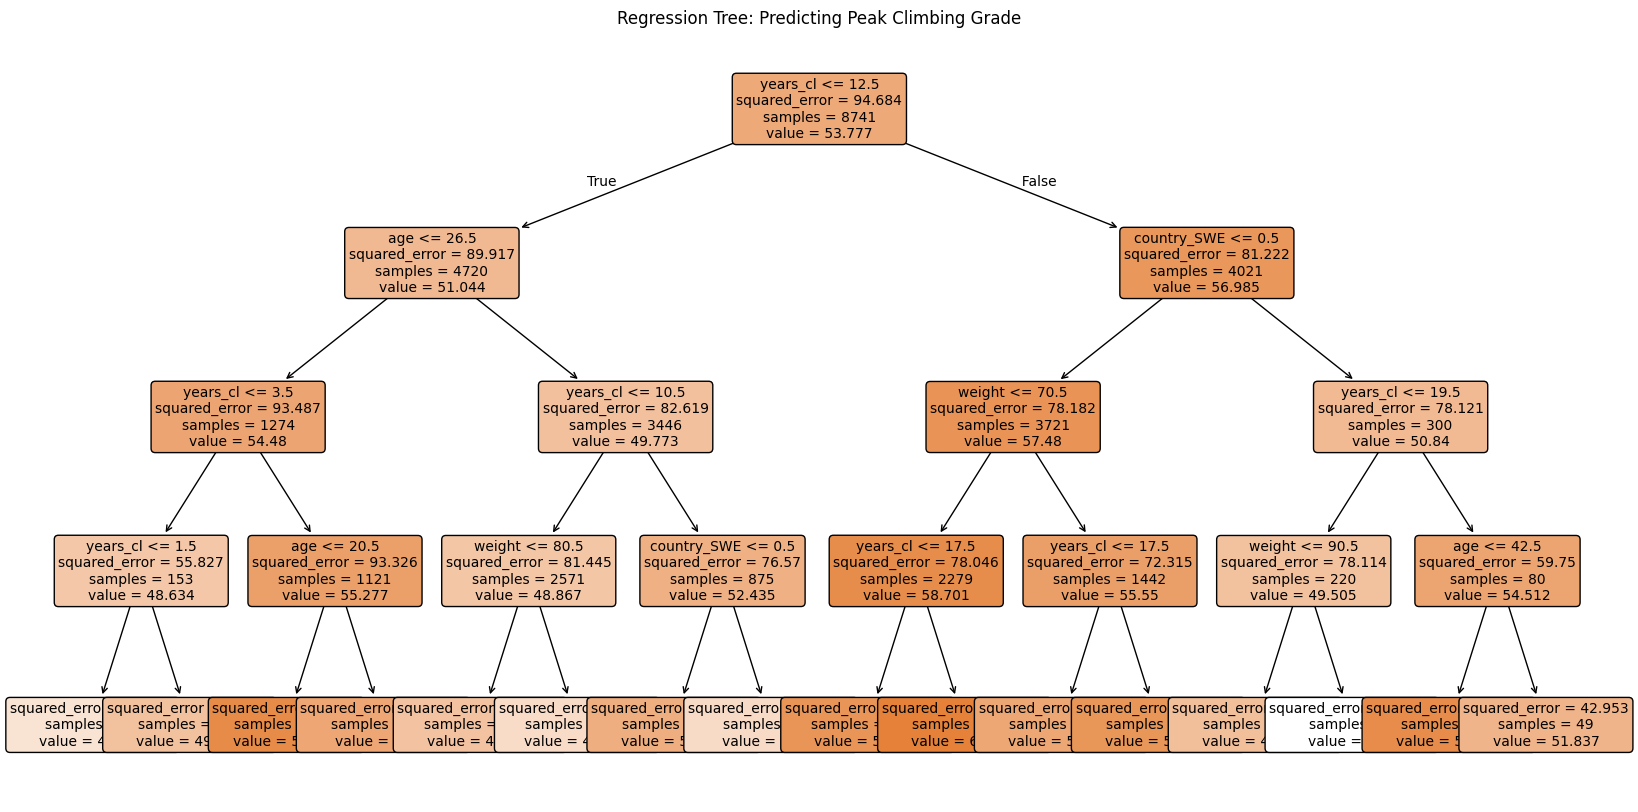

In [10]:
plt.figure(figsize=(20, 10))
plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Regression Tree: Predicting Peak Climbing Grade")
plt.show()